# Everyone Can Learn Data Scholarship

# 1️⃣ Part 1 (Python) - Dinosaur data 🦕

## 📖 Background
You're applying for a summer internship at a national museum for natural history. The museum recently created a database containing all dinosaur records of past field campaigns. Your job is to dive into the fossil records to find some interesting insights, and advise the museum on the quality of the data. 

## 💾 The data

### You have access to a real dataset containing dinosaur records from the Paleobiology Database ([source](https://paleobiodb.org/#/)):


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

The data was enriched with data from Wikipedia.

number of different names : 1042
biggest dinosaurs in length are :
                 length_m
name                     
Supersaurus          35.0
Argentinosaurus      35.0


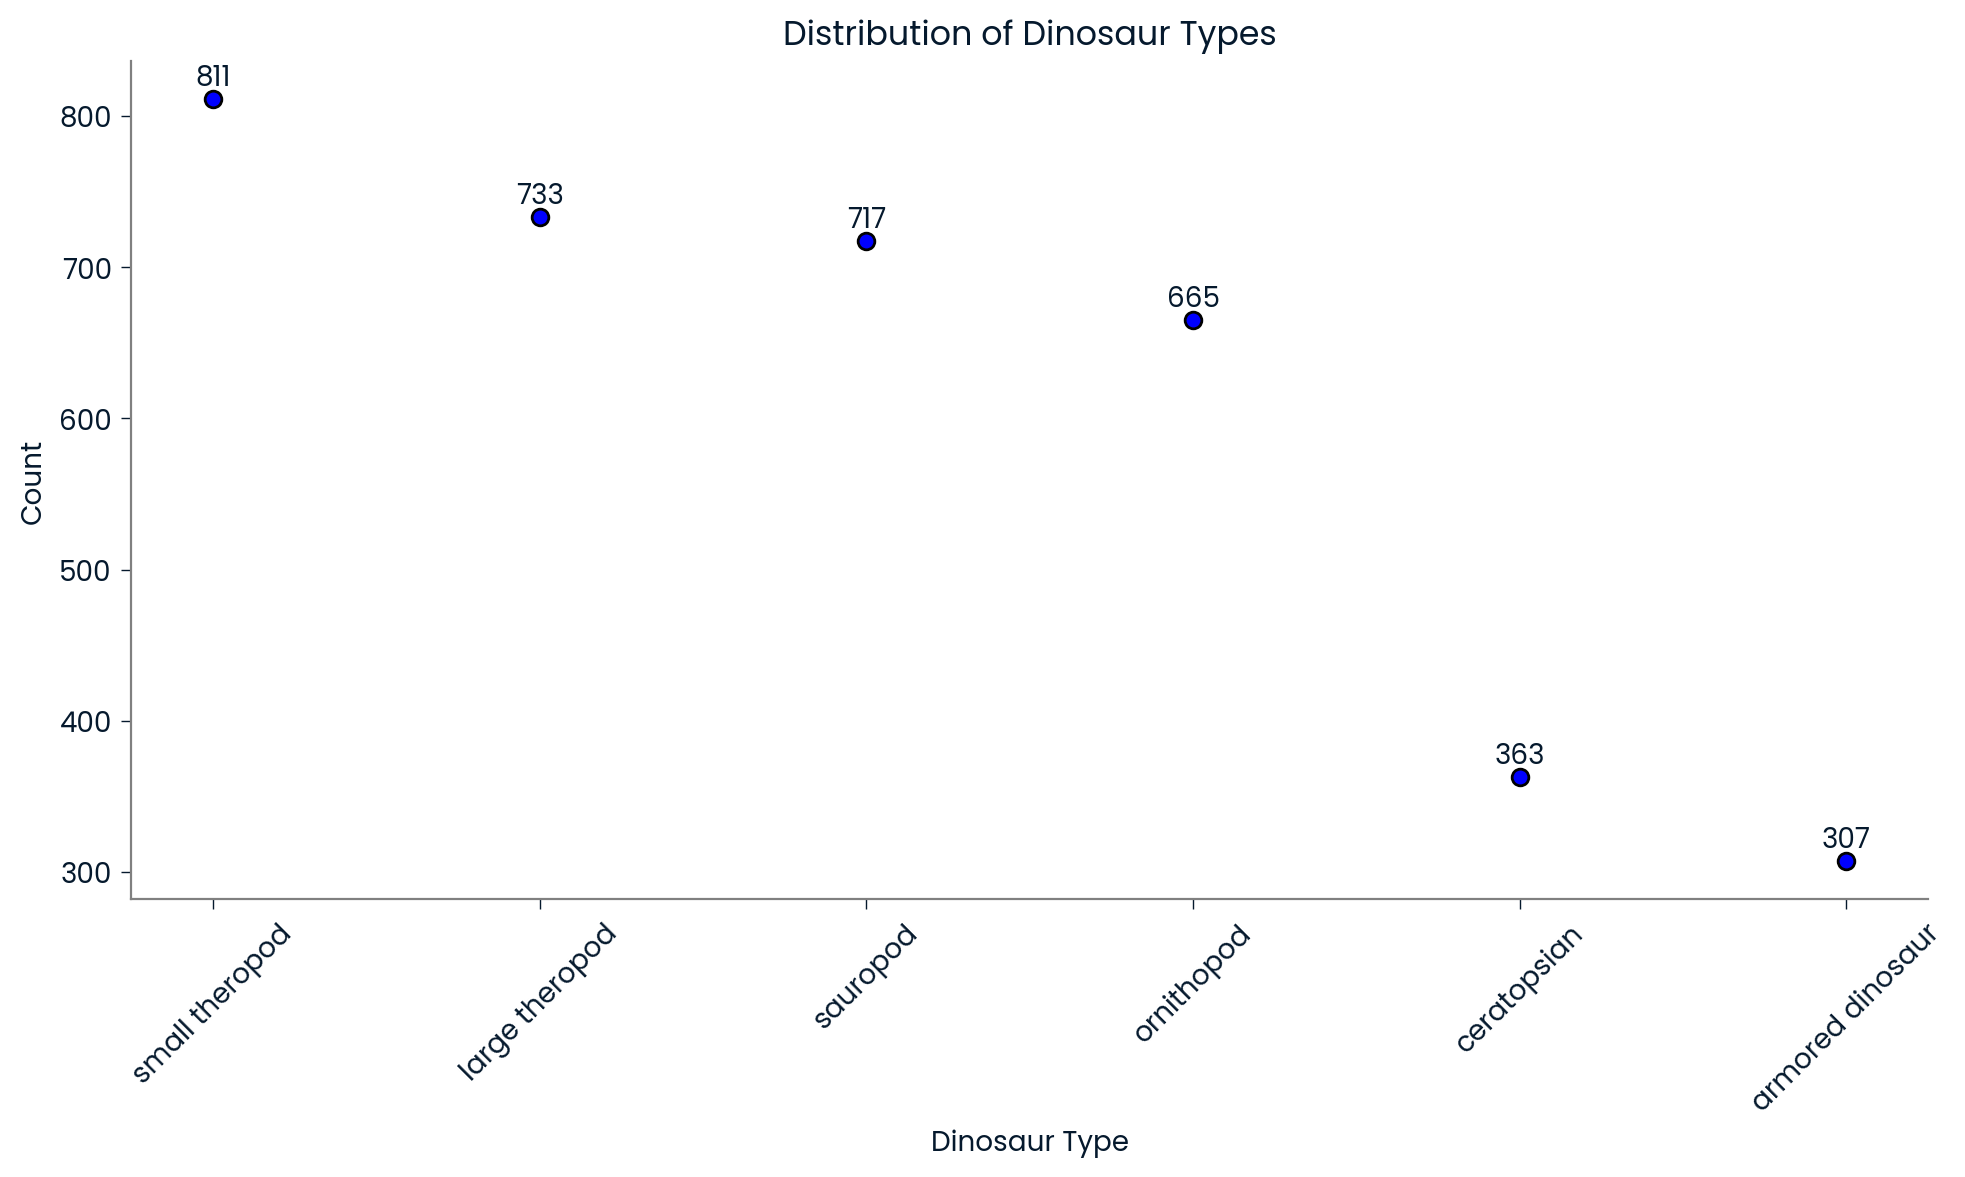

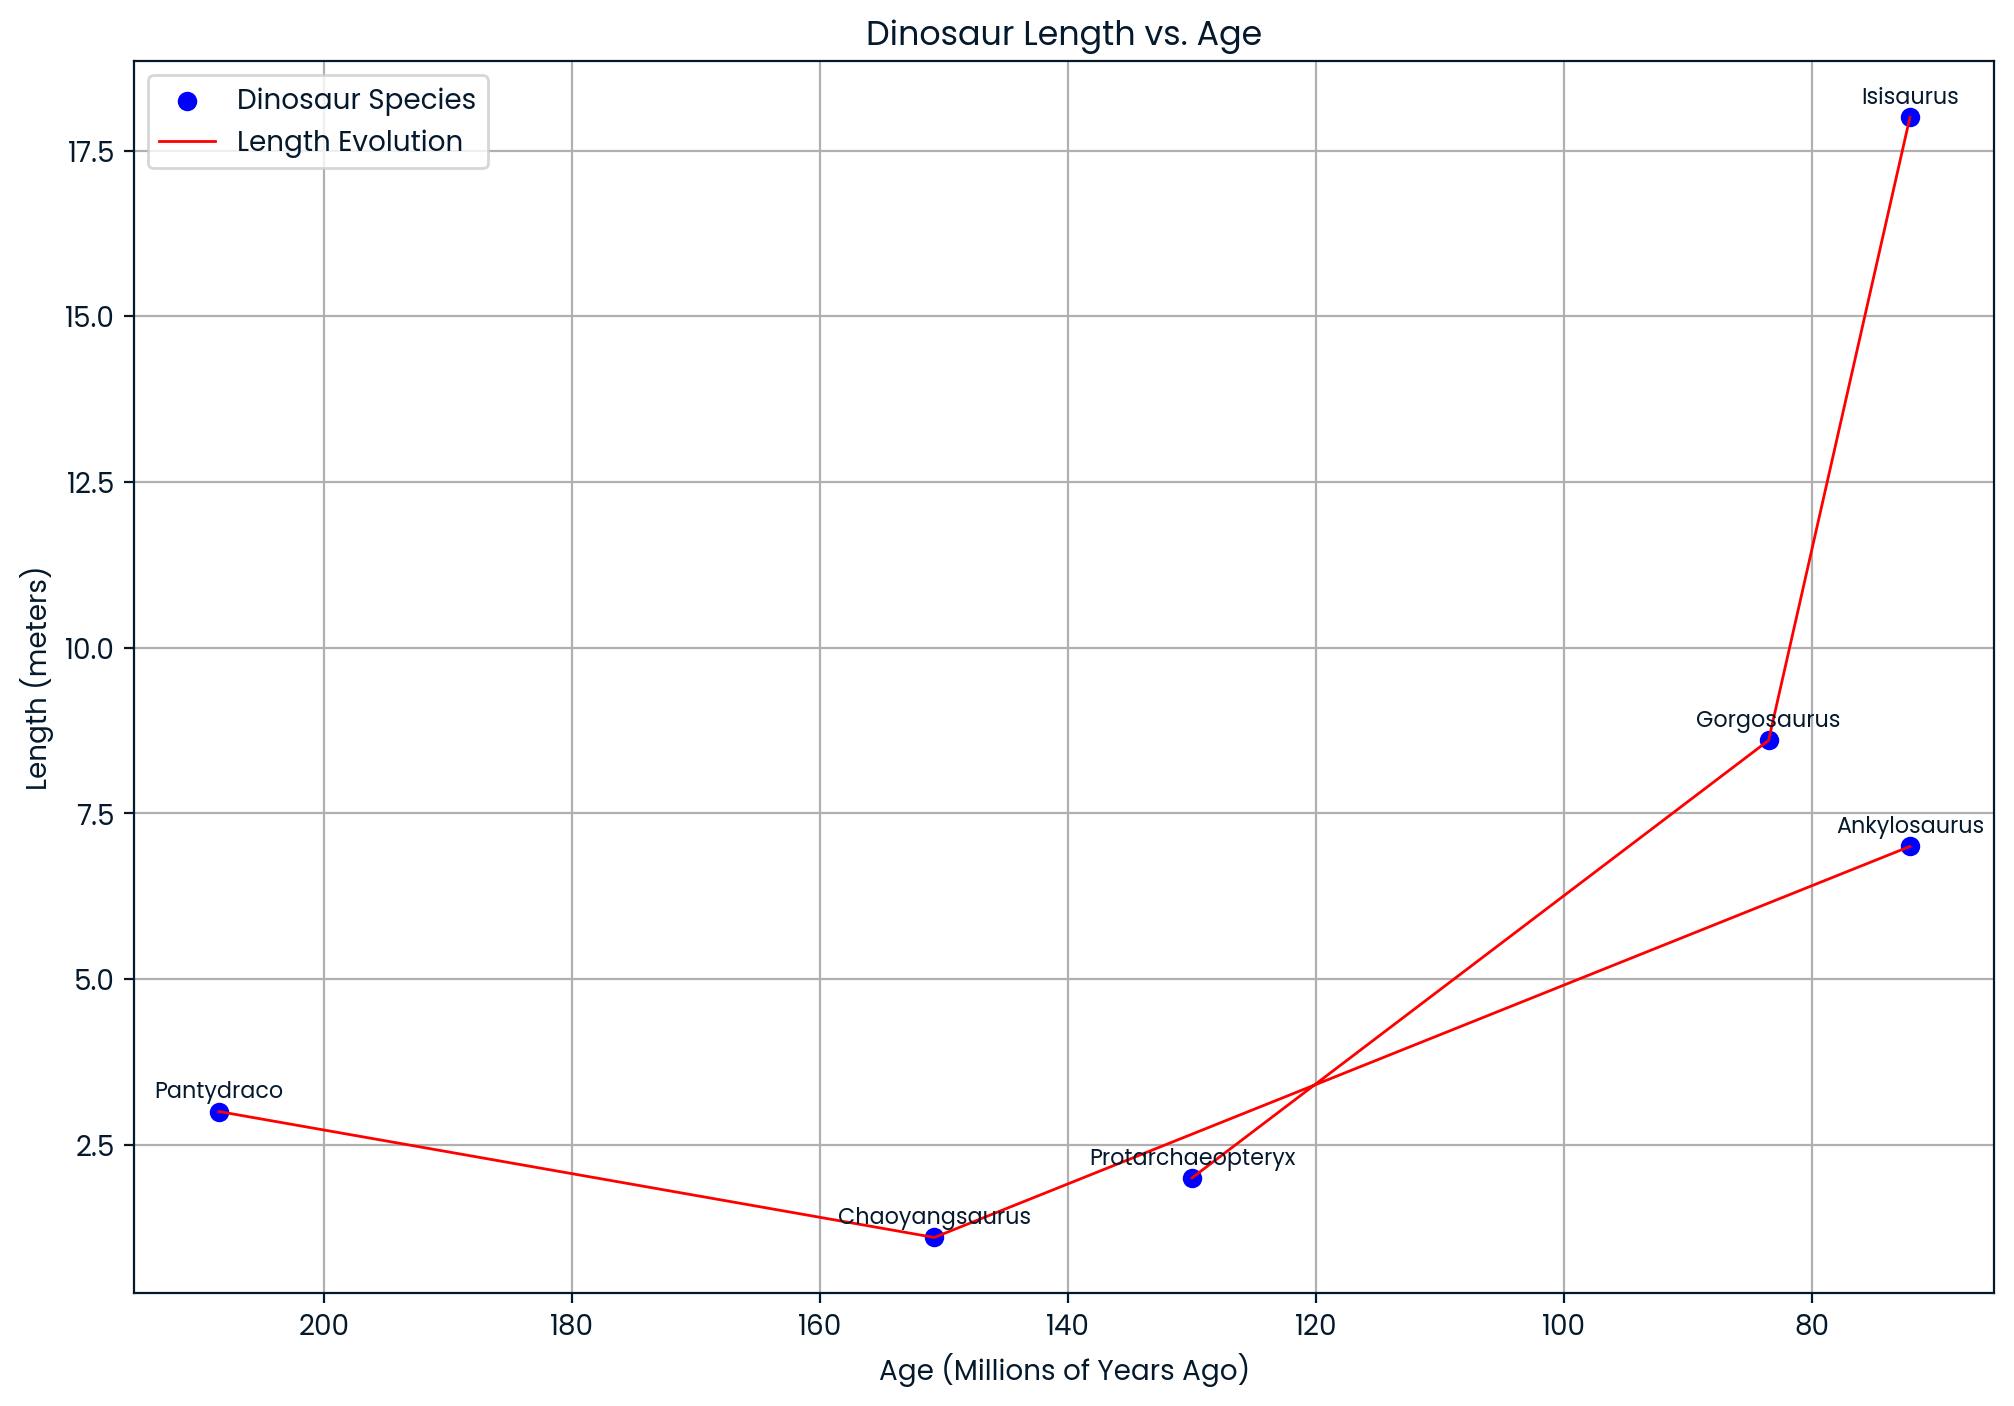

In [17]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

# Load the data
dinosaurs = pd.read_csv('data/dinosaurs.csv')

# to count number of different names
dn = dinosaurs.drop_duplicates(subset="name")["name"].size
print(f"number of different names : {dn}")

# maximum dinosaur in length
dm = dinosaurs["length_m"].max()
dmf = dinosaurs[dinosaurs["length_m"] == dm]
print("biggest dinosaurs in length are :")
print(dmf[["name", "length_m"]].drop_duplicates(subset="name").set_index("name"))

# distribution of dinosaurs in the dataset
dinosaurs_np = np.array(dinosaurs.value_counts(subset="type"))
names = np.array(dinosaurs["type"].drop_duplicates())
names = [i for i in names if(type(i) == type("e"))]

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.scatter(names, dinosaurs_np, color='blue', edgecolor='black')
plt.title('Distribution of Dinosaur Types')
plt.xlabel('Dinosaur Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding values on y-axis
for i, txt in enumerate(dinosaurs_np):
    plt.annotate(txt, (names[i], dinosaurs_np[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Decorating the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_tick_params(width=0.5)
plt.gca().xaxis.set_tick_params(width=0.5)
plt.tight_layout()
plt.show()

# Age and length evolution
dinosaurs_t = dinosaurs.drop_duplicates(subset="type")

# Plotting the data
plt.figure(figsize=(12, 8))
scatter = plt.scatter(dinosaurs_t['max_ma'], dinosaurs_t['length_m'], color='blue', label='Dinosaur Species')

# Adding labels for each point
for i, row in dinosaurs_t.iterrows():
    plt.annotate(row['name'], (row['max_ma'], row['length_m']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

# Adding a line to represent the evolution of length
plt.plot(dinosaurs_t['max_ma'], dinosaurs_t['length_m'], color='red', linestyle='-', linewidth=1, label='Length Evolution')

plt.xlabel('Age (Millions of Years Ago)')
plt.ylabel('Length (meters)')
plt.title('Dinosaur Length vs. Age')
plt.gca().invert_xaxis()  # Invert x-axis to show age progressing from past to present
plt.grid(True)

plt.legend()
plt.show()

# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for idx, row in dinosaurs.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=(
            f"<b>Name:</b> {row['name']}<br>"
            f"<b>Diet:</b> {row['diet']}<br>"
            f"<b>Type:</b> {row['type']}<br>"
            f"<b>Length (m):</b> {row['length_m']}<br>"
            f"<b>Max Age (Ma):</b> {row['max_ma']}<br>"
            f"<b>Min Age (Ma):</b> {row['min_ma']}<br>"
            f"<b>Region:</b> {row['region']}<br>"
            f"<b>Class:</b> {row['class']}<br>"
            f"<b>Family:</b> {row['family']}"
        )
    ).add_to(marker_cluster)
# Save the map to an HTML file
m.save('dinosaur_map.html')

# Display the map in the notebook
m

In [7]:
# Preview the dataframe
dinosaurs

occurrence_no               name  ...         class             family
0            130294  Protarchaeopteryx  ...    Saurischia  Archaeopterygidae
1            130295        Caudipteryx  ...    Saurischia    Caudipterygidae
2            139242        Gorgosaurus  ...    Saurischia    Tyrannosauridae
3            139250        Gorgosaurus  ...    Saurischia    Tyrannosauridae
4            139252        Gorgosaurus  ...    Saurischia    Tyrannosauridae
...             ...                ...  ...           ...                ...
4946        1360627      Isaberrysaura  ...  Ornithischia                NaN
4947        1363632        Stegosaurus  ...  Ornithischia      Stegosauridae
4948        1363633     Othnielosaurus  ...  Ornithischia                NaN
4949        1364695          Iguanodon  ...  Ornithischia                NaN
4950        1365108         Luluichnus  ...  Ornithischia                NaN

[4951 rows x 12 columns]

## 💪 Challenge I
Help your colleagues at the museum to gain insights on the fossil record data. Include:


1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
5. Use the AI assitant to create an interactive map showing each record. 
6. Any other insights you found during your analysis?

# 2️⃣ Part 2 (SQL) - Understanding movie data 🎥 

## 📖 Background
You have just been hired by a large movie studio to perform data analysis. Your manager, an executive at the company, wants to make new movies that "recapture the magic of old Hollywood." So you've decided to look at the most successful films that came out before Titanic in 1997 to identify patterns and help generate ideas that could turn into future successful films.

## 💾 The data

### You have access to the following table, _**cinema.films**_:

| Column name | Description |
|---|---|
| id | Unique movie identifier. |
| title | The title of the movie. |
| release_year | The year the movie was released to the public. |
| country | The country in which the movie was released. |
| duration | The runtime of the movie, in minutes. |
| language | The original language the movie was produced in. |
| certification | The [rating](https://simple.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system) the movie was given based on their suitability for audiences. |
| gross | The revenue the movie generated at the box office, in USD. |
| budget | The available budget the production had for producing the movie, in USD. |

You can click the "Browse tables" button in the upper right-hand corner of the SQL cell below to view the available tables. They will show on the left of the notebook.

The data was sourced from [IMDb](https://www.imdb.com/).

In [16]:
SELECT * 
FROM cinema.films
LIMIT 10;


id                                             title  ...      gross     budget
0   1  Intolerance: Love's Struggle Throughout the Ages  ...        NaN   385907.0
1   2                    Over the Hill to the Poorhouse  ...  3000000.0   100000.0
2   3                                    The Big Parade  ...        NaN   245000.0
3   4                                        Metropolis  ...    26435.0  6000000.0
4   5                                     Pandora's Box  ...     9950.0        NaN
5   6                               The Broadway Melody  ...  2808000.0   379000.0
6   7                                     Hell's Angels  ...        NaN  3950000.0
7   8                                A Farewell to Arms  ...        NaN   800000.0
8   9                                       42nd Street  ...  2300000.0   439000.0
9  10                                She Done Him Wrong  ...        NaN   200000.0

[10 rows x 9 columns]

## 💪 Challenge II
Help your team leader understand the data that's available in the _cinema.films_ dataset. Include:

1. How many movies are present in the database?
2. There seems to be a lot of missing data in the gross and budget columns. How many rows have missing data? What would you recommend your manager to do with these rows?
3. How many different certifications or ratings are present in the database?
4. What are the top five countries in terms of number of movies produced?
5. What is the average duration of English versus French movies? (Don't forget you can use the AI assistant!)
6. Any other insights you found during your analysis? 

In [6]:
--NUMBER OF MOVIES IN THE DATABASE
SELECT count(*) AS Number_of_movies
FROM cinema.films;

number_of_movies
0              4968

In [7]:
--MISSING DATA COUNT IN THE GROSS
SELECT COUNT(*) AS Total, SUM(CASE WHEN gross IS NULL THEN 1 ELSE 0 END) as Missing_Gross_Data
FROM cinema.films;


total  missing_gross_data
0   4968                 810

In [14]:
--MISSING DATA COUNT IN THE BUDGET
SELECT COUNT(*) AS Total, SUM(CASE WHEN budget IS NULL THEN 1 ELSE 0 END) as Missing_Budget_Data
FROM cinema.films;


total  missing_budget_data
0   4968                  430

In [9]:
--NUMBER OF DIFFERENT CERTIFICATIONS
SELECT COUNT(DISTINCT certification ) AS NUM_OF_DIFFRENT_CERTIFICATIONS
FROM cinema.films


num_of_diffrent_certifications
0                              13

In [10]:
--TOP 5 COUNTRIES BY NUMBER OF MOVIES
SELECT country,COUNT(*) AS Number_Of_Movies
FROM cinema.films
GROUP BY country
ORDER BY Number_Of_Movies DESC 
LIMIT 5


country  number_of_movies
0      USA              3750
1       UK               443
2   France               153
3   Canada               123
4  Germany                97

In [15]:
SELECT language,AVG(duration) AS AVERAGE_DURATION
FROM cinema.films
WHERE language IN ('English','French')
GROUP BY language

language  average_duration
0   French        104.666667
1  English        107.636541

## **Variety of Movie Ratings: Being aware of the different certifications can support targeting specific audience demographics**

## **Insights from Production by Country: Knowing which countries produce the most movies can highlight regional trends and preferences.**